In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, UpSampling2D, BatchNormalization
from keras.layers import LeakyReLU, ReLU
from keras import backend as K
from random import randrange

Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 1

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
comb_x_train = np.copy(x_train)
x_first_digit_train = np.copy(x_train)
y_second_digit_train = np.copy(x_train)

comb_x_test = np.copy(x_test)
x_first_digit_test = np.copy(x_test)
y_second_digit_test = np.copy(x_test)

In [4]:
# Create new data set
for i in range(x_train.shape[0]):
    j = randrange(x_train.shape[0])
    comb_x_train[i] = x_train[i] + x_train[j]
    y_second_digit_train[i] = x_train[j]

for i in range(x_test.shape[0]):
    j = randrange(x_test.shape[0])
    comb_x_test[i] = x_test[i] + x_test[j]
    y_second_digit_test[i] = x_test[j]

(60000, 28, 28)

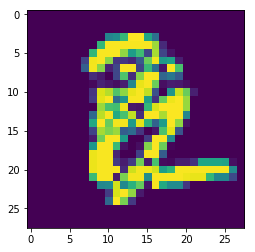

In [8]:
plt.imshow(comb_x_test[1])
x_train.shape

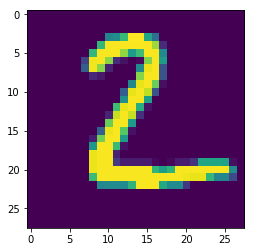

In [6]:
plt.imshow(x_first_digit_test[1])

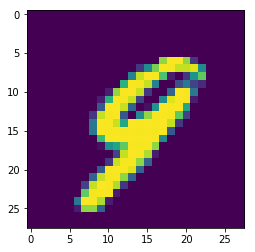

In [7]:
plt.imshow(y_second_digit_test[1])

In [9]:
# Reshape input data
comb_x_train = comb_x_train.reshape(comb_x_train.shape[0], img_rows, img_cols, 1)
x_first_digit_train = x_first_digit_train.reshape(x_first_digit_train.shape[0], img_rows, img_cols, 1)
y_second_digit_train = y_second_digit_train.reshape(y_second_digit_train.shape[0], img_rows, img_cols, 1)
comb_x_test = comb_x_test.reshape(comb_x_test.shape[0], img_rows, img_cols, 1)
x_first_digit_test = x_first_digit_test.reshape(x_first_digit_test.shape[0], img_rows, img_cols, 1)
y_second_digit_test = y_second_digit_test.reshape(y_second_digit_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 2)

# Concatenate input into 2 channels on axis 3
input_x_train = np.concatenate((comb_x_train,x_first_digit_train),axis=3)
input_x_test = np.concatenate((comb_x_test,x_first_digit_test),axis=3)

In [10]:
# Normalise input and output
input_x_train = input_x_train.astype('float32')
input_x_test = input_x_test.astype('float32')
output_y_train = y_second_digit_train.astype('float32')
output_y_test = y_second_digit_test.astype('float32')

input_x_train /= 255
input_x_test /= 255
output_y_train /= 255
output_y_test /= 255

In [11]:
# Define CNN
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(5*5*16, activation='relu'))
#model.add(Dropout(0.5))

model.add(LeakyReLU())
model.add(Reshape((5, 5, 16)))
#model.output_shape == (None, 2, 2, 32) # Note: None is the batch size
#model.summary()

model.add(Conv2DTranspose(8, (3, 3), strides=(1, 1)))
#model.output_shape == (None, 7, 7, 128)
model.add(BatchNormalization())
model.add(ReLU())
model.add(Conv2DTranspose(4, (3, 3), strides=(2, 2),padding='same'))
#model.output_shape == (None, 7, 7, 128)
model.add(BatchNormalization())
model.add(ReLU())
#model.summary()
#model.add(Conv2DTranspose(16, (3, 3), strides=(2, 2), padding='same', use_bias=False))
#model.output_shape == (None, 14, 14, 64)
model.add(BatchNormalization())
model.add(ReLU())

model.add(Conv2DTranspose(1, (3, 3), strides=(2, 2), padding='same', activation='sigmoid'))
#model.output_shape == (None, 28, 28, 1)

#model.add(Conv2DTranspose(32, (3,3), strides=(2, 2),  activation='leaky.relu', output_shape = (None, 14, 14, 32)))
#model.add(Conv2DTranspose(16, (3,3)))
#model.add(UpSampling2D())
#model.add(UpSampling2D())
#model.add(Conv2DTranspose(1, (1,1),  activation='relu'))
#model.output_shape == (None, 28, 28, 1)
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        608       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 128)        

In [12]:
input_x_train.shape

(60000, 28, 28, 2)

In [21]:
model.fit(input_x_train, output_y_train,
          batch_size=batch_size,
          epochs=40,
          verbose=1,
          validation_data=(input_x_test, output_y_test))
score = model.evaluate(input_x_test, output_y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 56s 927us/step - loss: 0.0958 - accuracy: 0.8132 - val_loss: 0.0853 - val_accuracy: 0.8142
Epoch 2/40
60000/60000 [==============================] - 56s 929us/step - loss: 0.0929 - accuracy: 0.8134 - val_loss: 0.0825 - val_accuracy: 0.8142
Epoch 3/40
60000/60000 [==============================] - 56s 926us/step - loss: 0.0911 - accuracy: 0.8136 - val_loss: 0.0816 - val_accuracy: 0.8141
Epoch 4/40
60000/60000 [==============================] - 56s 929us/step - loss: 0.0896 - accuracy: 0.8137 - val_loss: 0.0808 - val_accuracy: 0.8142
Epoch 5/40
60000/60000 [==============================] - 56s 931us/step - loss: 0.0887 - accuracy: 0.8137 - val_loss: 0.0796 - val_accuracy: 0.8142
Epoch 6/40
60000/60000 [==============================] - 56s 928us/step - loss: 0.0879 - accuracy: 0.8138 - val_loss: 0.0790 - val_accuracy: 0.8143
Epoch 7/40
60000/60000 [==============================] 

In [12]:
predictions = model.predict(input_x_test)

In [22]:
predictions40 = model.predict(input_x_test)

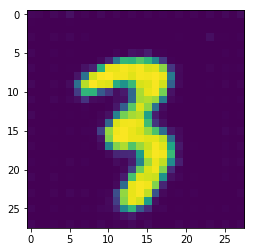

In [41]:
plt.imshow(predictions[6,:,:,0])

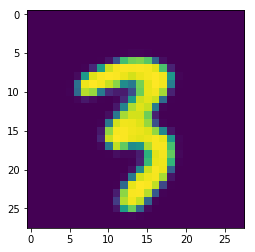

In [39]:
plt.imshow(predictions40[6,:,:,0])

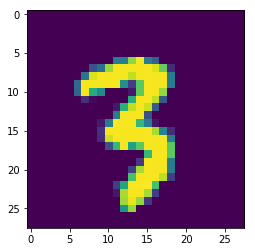

In [38]:
plt.imshow(output_y_test[6,:,:,0])

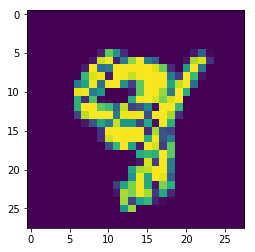

In [44]:
plt.imshow(input_x_test[6,:,:,0])

In [45]:
model.save("model.h5")